In [13]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Total number of fundings done in each year

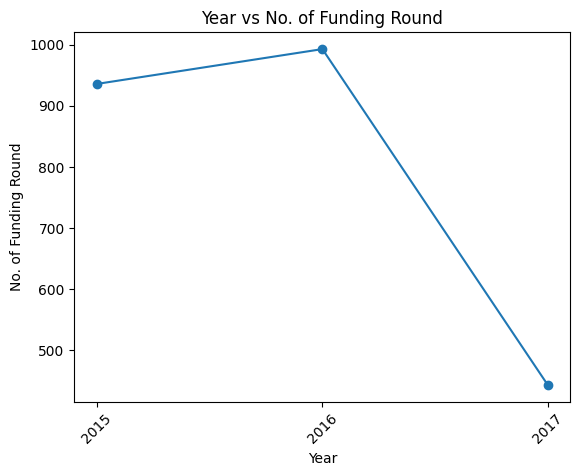

2015 936
2016 993
2017 443


In [6]:
df_start=pd.read_csv('/content/startup_funding.csv',encoding='utf-8')

df_start.rename(columns={'Date dd/mm/yyyy': 'Date'}, inplace=True)

df_start['Date'].replace("12/05.2015","12/05/2015",inplace=True)
df_start['Date'].replace("13/04.2015","13/04/2015",inplace=True)
df_start['Date'].replace("15/01.2015","15/01/2015",inplace=True)
df_start['Date'].replace("22/01//2015","22/01/2015",inplace=True)
df_start['Date'].replace("05/072018","05/07/2018",inplace=True)
df_start['Date'].replace("01/07/015","01/07/2015",inplace=True)

def convertDate(date):
    return date.split('/')[-1]

df_start['Year']=df_start['Date'].apply(convertDate)
year_count=df_start['Year'].value_counts()
year_fund=list(zip(year_count.index,year_count.values))
year_fund=np.array(year_fund,dtype=int)
year_fund=year_fund[year_fund[:,0].argsort()]
year=year_fund[:,0]
funding_round=year_fund[:,1]
plt.plot(year,funding_round,marker = 'o')
plt.xticks(year, rotation=45)
plt.title('Year vs No. of Funding Round')
plt.xlabel('Year')
plt.ylabel('No. of Funding Round')
plt.show()
for i in range(len(year)):
    print(year[i],funding_round[i])

2)  Top 10 Indian cities which have most number of startups.

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


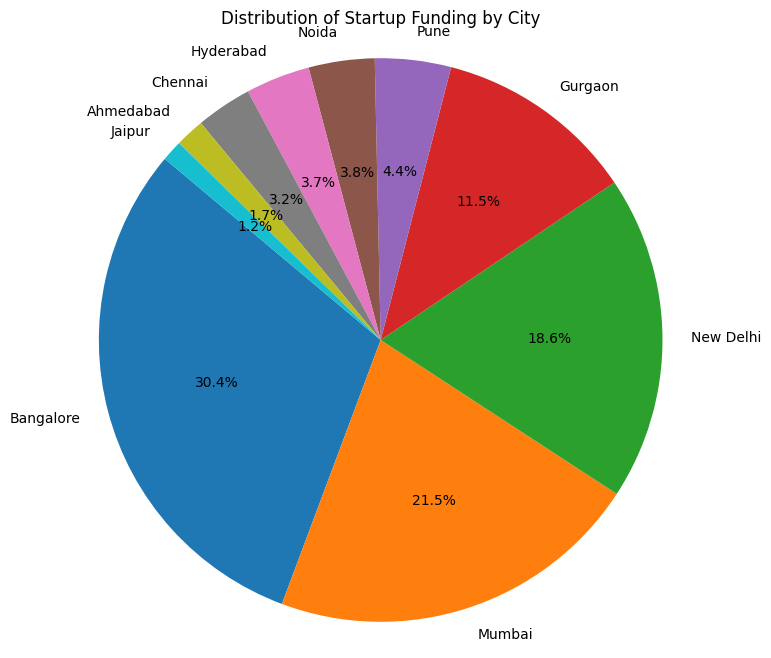

In [10]:
df_start = pd.read_csv('/content/startup_funding.csv', encoding='utf-8')

df_start.rename(columns={'City  Location': 'CityLocation'}, inplace=True)

df_start['CityLocation'].dropna(inplace=True)

def separateCity(city):
  if isinstance(city, str):
    return city.split('/')[0].strip()
  else:
    return city

df_start['CityLocation'] = df_start['CityLocation'].apply(separateCity)

df_start['CityLocation'].replace("Delhi", "New Delhi", inplace=True)
df_start['CityLocation'].replace("bangalore", "Bangalore", inplace=True)

city_number = df_start['CityLocation'].value_counts().head(10)

city = city_number.index
numCity = city_number.values

for i in range(len(city)):
    print(city[i], numCity[i])

plt.figure(figsize=(8, 8))
plt.pie(numCity, labels=city, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Startup Funding by City')
plt.axis('equal')
plt.show()

3) Top 10 Indian cities with most amount of fundings received.

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


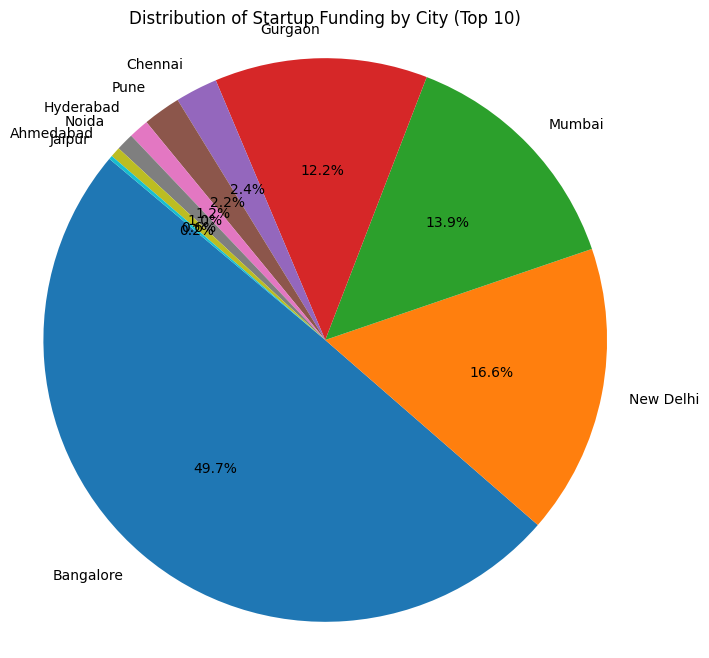

In [11]:
df_start = pd.read_csv('/content/startup_funding.csv', encoding='utf-8')

df_start.rename(columns={'City  Location': 'CityLocation'}, inplace=True)
df_start.rename(columns={'Amount in USD': 'AmountInUSD'}, inplace=True)


df_start['CityLocation'].dropna(inplace=True)
def separateCity(city):
  if isinstance(city, str):
    return city.split('/')[0].strip()
  else:
    return city

df_start['CityLocation']=df_start['CityLocation'].apply(separateCity)
df_start['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df_start['CityLocation'].replace("bangalore","Bangalore",inplace=True)

df_start["AmountInUSD"]=df_start["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df_start["AmountInUSD"]=pd.to_numeric(df_start["AmountInUSD"])
city_amount=df_start.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)[0:10]

city=city_amount.index
amountCity=city_amount.values
perAmount=np.true_divide(amountCity, amountCity.sum())*100

for i in range(len(city)):
    print(city[i],format(perAmount[i],'.2f'))

plt.figure(figsize=(8, 8))
plt.pie(perAmount, labels=city_amount.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Startup Funding by City (Top 10)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

4) Percentage of amount funded for each investment type.

In [14]:
df=pd.read_csv('startup_funding.csv',encoding='utf-8')

df.dropna(subset=['InvestmentType'], inplace=True)
df['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
df['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
df['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

df["AmountInUSD"]=df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))
df["AmountInUSD"]=pd.to_numeric(df["AmountInUSD"])

investment_amt=df.groupby('InvestmentType')['AmountInUSD'].sum().sort_values(ascending=False)

investment_type=investment_amt.index
amount_investment=investment_amt.values
perAmount=np.true_divide(amount_investment, amount_investment.sum())*100

for i in range(len(investment_type)):
    print(investment_type[i],format(perAmount[i],'.2f'))

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


5) Top 5 industries and percentage of the total amount funded to that industry.

<ipython-input-18-087072e7f3de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.AmountInUSD.loc[df.AmountInUSD.isnull()]='0'


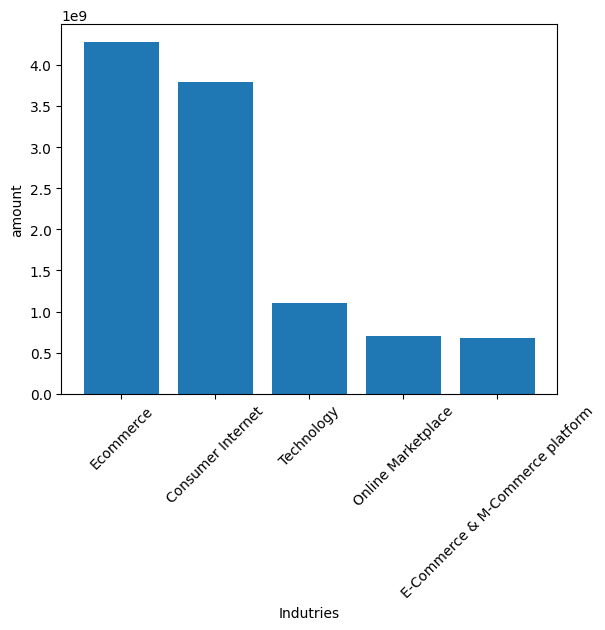

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


In [18]:
data=pd.read_csv('startup_funding.csv')
df=data.copy()
df.AmountInUSD.loc[df.AmountInUSD.isnull()]='0'
df.drop(df['SNo'].loc[df.IndustryVertical.isnull()], inplace=True)
np_industry=np.array(df['IndustryVertical'])
np_amount=np.array(df['AmountInUSD'])
np_industry[np_industry=='eCommerce']='Ecommerce'
np_industry[np_industry=='ecommerce']='Ecommerce'
np_industry[np_industry=='ECommerce']='Ecommerce'

for i in range(len(np_amount)):
    np_amount[i]=''.join(np_amount[i].split(','))
np_amount=np.array(np_amount, dtype='int64')
#print()
dic=dict()
for i in range(len(np_amount)):
    if np_industry[i] in dic.keys():
        dic[np_industry[i]]+=np_amount[i]
    else:
        dic[np_industry[i]]=np_amount[i]

x=[]
y=[]
for i in dic.keys():
    x.append(i)
    y.append(dic[i])
n_x=np.array(x)
n_y=np.array(y)
n_x=n_x[np.argsort(n_y)]
n_y=np.sort(n_y)

n_x=n_x[len(n_x):len(n_x)-6:-1]
n_y=n_y[len(n_y):len(n_y)-6:-1]
#print(n_x,n_y)
plt.bar(n_x,n_y)
plt.xlabel('Indutries')
plt.ylabel('amount')
plt.xticks(rotation=45)
plt.show()

for i in range(len(n_x)):
    print(n_x[i], format((n_y[i]*100)/sum(n_y) , '.2f'))
    #print(dic)

6) Top 5 startups with most amount of total funding.

In [19]:
data = pd.read_csv('startup_funding.csv')

df = data.copy()

df['AmountInUSD'].fillna('0', inplace=True)
df['AmountInUSD'] = pd.to_numeric(df['AmountInUSD'].str.replace(',', ''))

df.dropna(subset=['StartupName'], inplace=True)

corrections = {
    'Olacabs': 'Ola',
    'Ola Cabs': 'Ola',
    'Ola Electric': 'Ola',
    'Flipkart.com': 'Flipkart',
    'OyoRooms': 'Oyo',
    'OYO Rooms': 'Oyo',
    'Oyo Rooms': 'Oyo',
    'OYOfit': 'Oyo',
    'paytm': 'Paytm',
    'Paytm Marketplace': 'Paytm'
}
df['StartupName'] = df['StartupName'].replace(corrections)

startup_funding = df.groupby('StartupName')['AmountInUSD'].sum().reset_index()

top_startups = startup_funding.sort_values(by='AmountInUSD', ascending=False)

for startup_name in top_startups['StartupName'].head(5):
    print(startup_name)

Paytm
Flipkart
Ola
Snapdeal
Oyo


7) Top 5 startups who received the most number of funding rounds.

In [20]:
df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Ola 9
Swiggy 7
UrbanClap 6
Paytm 6
Oyo 6


8) The Investor who have invested maximum number of times.

In [21]:
file = open('startup_funding.csv')
file_data=csv.DictReader(file,skipinitialspace=True)
dic = {}
year = []
for row in file_data:
  a=row['InvestorsName']

  if a!="Undisclosed Investors" and a!="Undisclosed investors":
    for i in row['InvestorsName'].split(','):
       year.append(i.strip())

for a in year:
 if a in dic.keys():
     dic[a]+=1
 else:
     dic[a]=1
ans=max(dic,key=dic.get)
print(ans,end = ' ')
print(dic[ans])

Sequoia Capital 64
